Ce notebook propose une analyse du Dataset 2a de la BCI Competition, qui comporte quatre classes : left hand (main gauche), right hand (main droite), tongue (langue) et feet (pieds). L'objectif est d'observer l'évolution des matrices de covariance des signaux à travers le temp.

<h1> A propos des données </h1>
Cet ensemble de données se compose de données EEG provenant de 9 sujets. Le paradigme BCI basé sur des indices se composait de quatre tâches d'imagerie motrice différentes, à savoir l'imagination du mouvement de la main gauche (classe 1), de la main droite (classe 2), des deux pieds (classe 3) et de la langue (classe 4). Deux sessions ont été enregistrées pour chaque sujet, à des jours différents. Chaque session est composée de 6 séquences séparées par de courtes pauses. Une séquence se compose de 48 essais (12 pour chacune des quatre classes possibles), ce qui donne un total de 288 essais par session.

Les sujets étaient assis dans un fauteuil confortable devant un écran d'ordinateur. Au début d'un essai (t = 0 s), une croix de fixation apparaissait sur l'écran noir. De plus, un bref signal sonore d'avertissement était présenté. Après deux secondes (t = 2 s), un indice sous forme d'une flèche pointant vers la gauche, la droite, le bas ou le haut (correspondant à l'une des quatre classes de la main gauche, de la main droite, du pied ou de la langue) apparaissait et restait sur l'écran pendant 1,25 s. Cela incitait les sujets à effectuer la tâche d'imagerie motrice désirée. Aucune rétroaction n'était fournie. Les sujets étaient invités à effectuer la tâche d'imagerie motrice jusqu'à ce que la croix de fixation disparaisse de l'écran à t = 6 s.

Vingt-deux électrodes Ag/AgCl (avec des distances inter-électrodes de 3,5 cm) ont été utilisées pour enregistrer l'EEG ; le montage est présenté dans la figure 3 à gauche. Tous les signaux ont été enregistrés de manière monopolaire, avec le mastoïde gauche comme référence et le mastoïde droit comme terre. Les signaux ont été échantillonnés à 250 Hz et filtrés en bande passante entre 0,5 Hz et 100 Hz. La sensibilité de l'amplificateur a été réglée à 100 μV. Un filtre coupe-bande supplémentaire à 50 Hz a été activé pour supprimer le bruit de ligne.

<h1>Importation et Prétraitement des Données :</h1> Les données de la première session du premier sujet sont chargées à partir du Dataset 2a. Les segments correspondant à chaque classe (left hand, right hand, tongue, feet) sont extraits de la  première session du premier run du premier sujet.

In [3]:
import mne
import moabb
import numpy as np
from moabb.datasets import BNCI2014_001
dataset = BNCI2014_001()
sessions = dataset.get_data(subjects=[1])
subject = 1
session_name = "0train"
run_name = "0"
raw = sessions[subject][session_name][run_name]

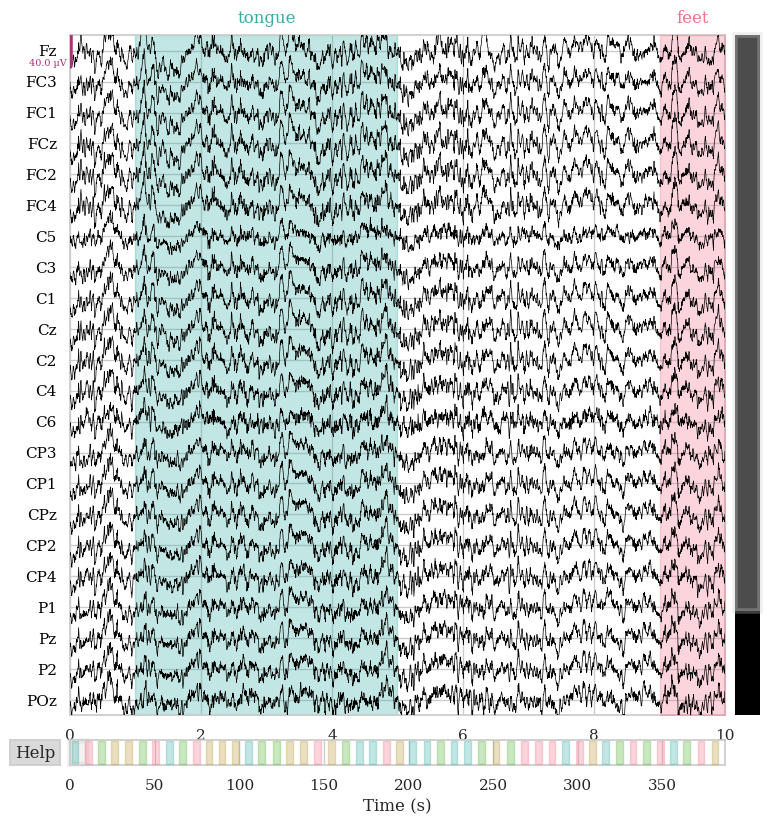

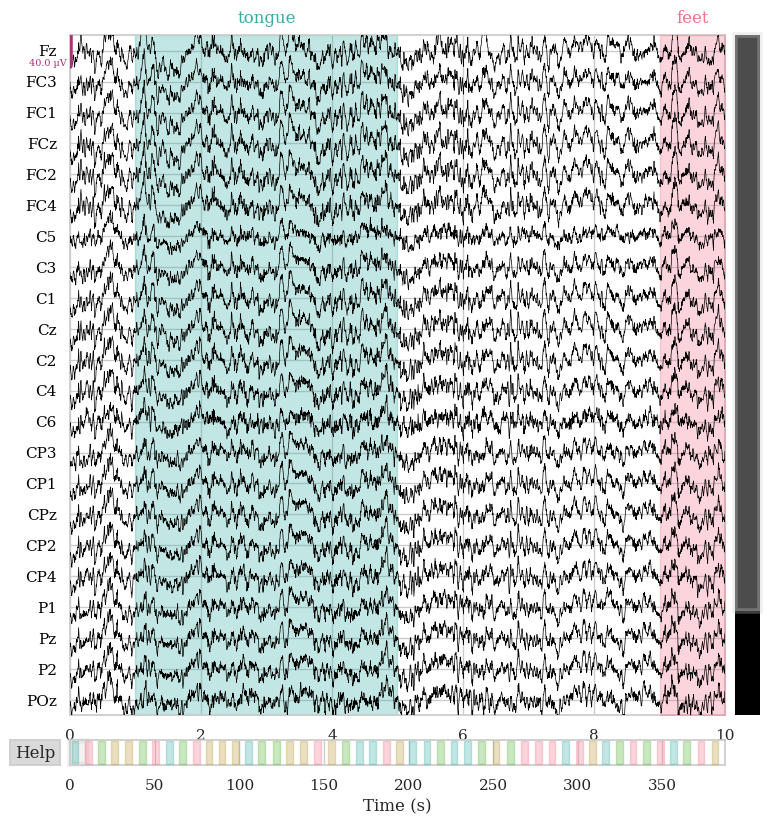

In [31]:
raw.plot(duration=10, n_channels=22)

Using matplotlib as 2D backend.


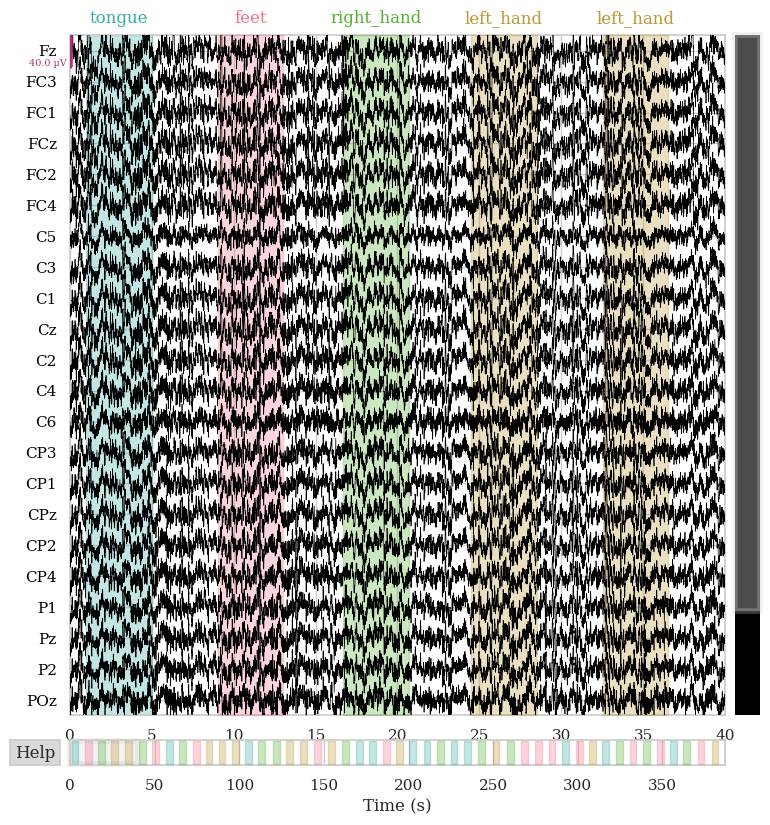

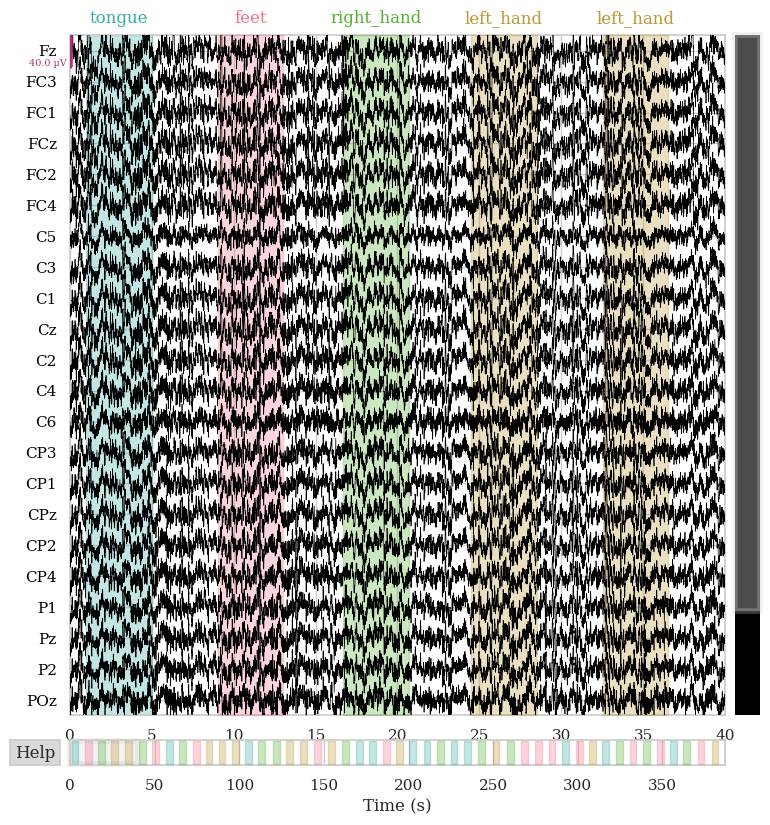

In [4]:
raw.plot(duration=40, n_channels=22)

<h1>Calcul de la Covariance :</h1> 
À partir des données EEG, la covariance est calculée toutes les deux secondes. Cela permet de capturer les relations linéaires entre les différentes électrodes à travers le temps.
Il existe plusieur méthode dans mne pourle calcule de la covariance parmis ces méthodes il  y'a la méthode empirique ainsi que ‘diagonal_fixed’, ‘shrunk’, ‘oas’, ‘ledoit_wolf’, ‘factor_analysis’, ‘shrinkage’. Dans cette exemple je vais utiliser la méthode empirique.

<h1>Enregistrement des Matrices de Covariance :</h1> Chaque matrice de covariance est sauvegardée dans une varible figure_list ainsi qu'au format JPG pour créer un GIF animé illustrant l'évolution de la covariance dans le temps.

Using up to 10 segments
Number of samples used : 500
[done]


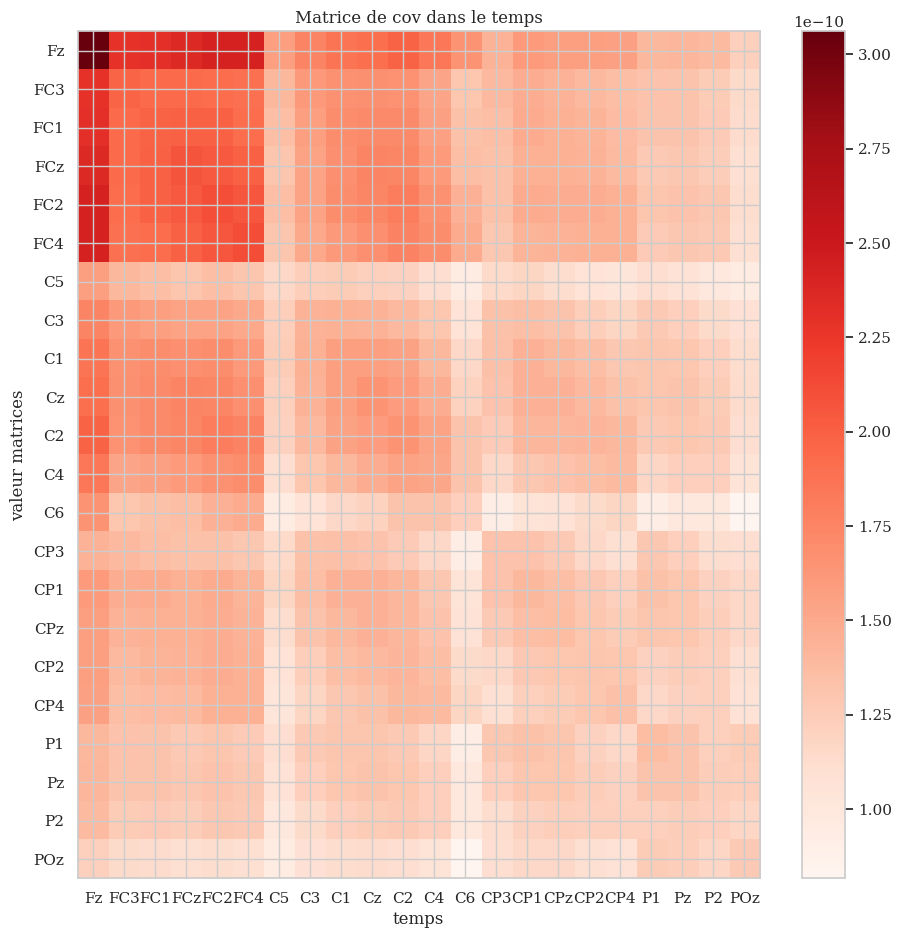

In [7]:
import numpy as np
import matplotlib.pyplot as plt
def afficher_cov_temp(matrice, t_list=[]):
    plt.figure(figsize=(11, 11))
    plt.imshow(matrice, cmap='Reds', aspect='auto')
    plt.xticks(np.arange(len(t_list)), t_list)
    plt.yticks(np.arange(len(t_list)), t_list)
    plt.title("Matrice de cov dans le temps")
    plt.xlabel("temps")
    plt.ylabel("valeur matrices")
    plt.colorbar()  # Ajouter une barre de couleur pour la référence
    plt.show()

t_list= ['Fz', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'P1', 'Pz', 'P2', 'POz']
afficher_cov_temp(mne.compute_raw_covariance(raw, tmin=0, tmax=2, method='empirical').data,t_list)

In [29]:
print(mne.events_from_annotations(raw))

Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
(array([[  250,     0,     4],
       [ 2253,     0,     1],
       [ 4171,     0,     3],
       [ 6123,     0,     2],
       [ 8131,     0,     2],
       [10242,     0,     3],
       [12159,     0,     1],
       [14209,     0,     4],
       [16140,     0,     3],
       [18138,     0,     1],
       [20044,     0,     2],
       [21939,     0,     2],
       [23911,     0,     2],
       [25855,     0,     4],
       [27822,     0,     3],
       [29942,     0,     3],
       [31950,     0,     2],
       [34016,     0,     2],
       [36052,     0,     1],
       [38118,     0,     2],
       [40188,     0,     3],
       [42268,     0,     4],
       [44180,     0,     4],
       [46211,     0,     1],
       [48164,     0,     2],
       [50125,     0,     4],
       [52229,     0,     4],
       [54233,     0,     3],
       [56208,     0,     4],
       [58234,     0,     4],
       [60305,     0, 

In [110]:
# Vérifier les valeurs nulles ou infinies
for i in range(len(epochs)):
    data = epochs[i].get_data()
    if np.any(np.isnan(data)) or np.any(np.isinf(data)):
        print("Les données contiennent des valeurs NaN ou infinies.")
    else:
        print("Les données ne contiennent pas de valeurs NaN ou infinies.")

Les données ne contiennent pas de valeurs NaN ou infinies.
Les données ne contiennent pas de valeurs NaN ou infinies.
Les données ne contiennent pas de valeurs NaN ou infinies.
Les données ne contiennent pas de valeurs NaN ou infinies.
Les données ne contiennent pas de valeurs NaN ou infinies.
Les données ne contiennent pas de valeurs NaN ou infinies.
Les données ne contiennent pas de valeurs NaN ou infinies.
Les données ne contiennent pas de valeurs NaN ou infinies.
Les données ne contiennent pas de valeurs NaN ou infinies.
Les données ne contiennent pas de valeurs NaN ou infinies.
Les données ne contiennent pas de valeurs NaN ou infinies.
Les données ne contiennent pas de valeurs NaN ou infinies.
Les données ne contiennent pas de valeurs NaN ou infinies.
Les données ne contiennent pas de valeurs NaN ou infinies.
Les données ne contiennent pas de valeurs NaN ou infinies.
Les données ne contiennent pas de valeurs NaN ou infinies.
Les données ne contiennent pas de valeurs NaN ou infinie

C:\Users\ABC\AppData\Local\Temp\ipykernel_13112\14265508.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs[i].get_data()
C:\Users\ABC\AppData\Local\Temp\ipykernel_13112\14265508.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs[i].get_data()
C:\Users\ABC\AppData\Local\Temp\ipykernel_13112\14265508.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs[i].get_data()
C:\Users\ABC\AppData\Local\Temp\ipykernel_13112\14265508.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs[i].get_data()
C:\Users\ABC\AppData\Local\Temp\ipykernel_13112\14265508.py:3: FutureWarning: Th

In [ ]:
import mne
import moabb
import numpy as np
from moabb.datasets import BNCI2014_001
import matplotlib.pyplot as plt

# Charger les données
dataset = BNCI2014_001()
sessions = dataset.get_data(subjects=[1])
subject = 1
session_name = "0train"
run_name = "0"
raw = sessions[subject][session_name][run_name]

# Définir les événements et l'intervalle d'époque
events, event_id = mne.events_from_annotations(raw)
event_duration = 8.0  # Durée de chaque époque en secondes

# Créer les époques
epochs = mne.Epochs(raw, events, event_id, tmin=0, tmax=event_duration, baseline=None, preload=True)

# Initialiser les listes pour stocker les covariances et les labels
vect_cov_list = []
label_list = []


for i in range(epochs.events.shape[0]):
    epoch = epochs[i]
    for j in range(0, int(event_duration)):
        # Vérifier si le segment est suffisamment long pour éviter les erreurs
        tmin = j
        tmax = j + 1
        if tmax <= event_duration:
            # Calculer la covariance pour chaque segment d'époque
            cropped_epoch = epoch.copy().crop(tmin=tmin, tmax=tmax)
        if cropped_epoch.get_data().shape[-1] > 1: # S'assurer qu'il y a plus d'un échantillon
            cov_segment = mne.compute_covariance(cropped_epoch, method='empirical')
            
        # Ajouter la matrice de covariance à la liste
        vect_cov_list.append(cov_segment['data'])
            
        # Ajouter le label correspondant à la liste
        label_list.append(epoch.events[0, -1])




In [132]:
# Importation des bibliothèques nécessaires
import numpy as np
from pyriemann.utils.base import logm
from scipy.linalg import sqrtm

def tangent_space_projection(A, B):
    
    # Calcul de la racine carrée de B
    sqrt_B = sqrtm(B)

    # Calcul de B^(-1/2)
    sqrt_inv_B = np.linalg.inv(sqrt_B)

    # Calcul de B^(1/2) A B^(-1/2)
    transformed_A = np.dot(np.dot(sqrt_inv_B, A), sqrt_inv_B)

    # Calcul du logarithme matriciel de B^(1/2) A B^(-1/2)
    log_transformed_A = logm(transformed_A)

    # Projet dans l'espace tangent de B
    tangent_space_A = np.dot(np.dot(sqrt_B, log_transformed_A), sqrt_B)

    return tangent_space_A



In [133]:
# Importation des bibliothèques nécessaires
import numpy as np
from pyriemann.utils.base import expm
from scipy.linalg import sqrtm

def inverse_tangent_space_projection(ProjB_A, B):
    # Calcul de la racine carrée de B
    sqrt_B = sqrtm(B)
    # Calcul de B^(-1/2)
    sqrt_inv_B = np.linalg.inv(sqrt_B)
    # Calcul de B^(-1/2) * ProjB_A * B^(-1/2)
    transformed_ProjB_A = np.dot(np.dot(sqrt_inv_B, ProjB_A), sqrt_inv_B)
    # Calcul de l'exponentielle matricielle de B^(-1/2) * ProjB_A * B^(-1/2)
    exp_transformed_ProjB_A = expm(transformed_ProjB_A)
    # Revenir à l'espace original
    original_A = np.dot(np.dot(sqrt_B, exp_transformed_ProjB_A), sqrt_B)
    return original_A



In [134]:
# Importation des bibliothèques nécessaires
import numpy as np
from scipy.linalg import sqrtm

def transport_vector(Delta, A, B):
    # Calcul de l'inverse de B
    inv_B = np.linalg.inv(B)
    # Calcul de A * B^(-1)
    A_invB = np.dot(A, inv_B)
    # Calcul de E = (A * B^(-1))^(1/2)
    E = sqrtm(A_invB)
    # Transport de Delta du plan tangent T_B vers T_A en utilisant la transposée de E
    transported_Delta = np.dot(np.dot(E, Delta), E.T)
    return transported_Delta



In [155]:
# Liste pour stocker les projections
projections = []
n=len(vect_cov_list)
# Calcul des projections pour chaque paire de matrices consécutives
projections.append(tangent_space_projection(vect_cov_list[0],vect_cov_list[1]))
for i in range(1,n-1):
    projections.append(tangent_space_projection(vect_cov_list[i],vect_cov_list[i+1]))
    for j in range(i-1, -1, -1):
        projections[j]= transport_vector(projections[j], vect_cov_list[i+1], vect_cov_list[i])
    